<a href="https://colab.research.google.com/github/SeongjinPark/CoLAB/blob/master/W_GAN_dressGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Training PArams
learning_rate = 0.0002
batch_size = 128
epochs = 100000

#Network params
image_dim = 784 #img sz is 28x28
Y_dimension = 10 # The number of classes
gen_hidd_dim = 256
disc_hidd_dim  = 256
z_noise_dim = 100

def xavier_init(shape):
  return tf.random_normal(shape = shape, stddev= 1./tf.sqrt(shape[0]/2.0))

In [0]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2020-03-15 13:54:16--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.19
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M   103MB/s    in 0.2s    

2020-03-15 13:54:21 (103 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2020-03-15 13:54:23--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.142
Connecting to fashion-mnist.s3-website.eu-central-1.amazona

In [0]:
!ls

sample_data		   train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz  train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [0]:
!mkdir MNIST_Fashion
!cp *.gz MNIST_Fashion/


mkdir: cannot create directory ‘MNIST_Fashion’: File exists
Extracting MNIST_Fashion/train-images-idx3-ubyte.gz
Extracting MNIST_Fashion/train-labels-idx1-ubyte.gz
Extracting MNIST_Fashion/t10k-images-idx3-ubyte.gz
Extracting MNIST_Fashion/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f994bddb5c0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f994bddb2e8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f994bddb630>)


Extracting MNIST_Fashion/train-images-idx3-ubyte.gz
Extracting MNIST_Fashion/train-labels-idx1-ubyte.gz
Extracting MNIST_Fashion/t10k-images-idx3-ubyte.gz
Extracting MNIST_Fashion/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f994b916940>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f994b916f60>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f994b916ac8>)


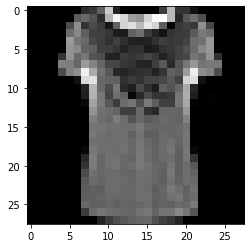

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_Fashion/")
print(mnist)
plt.imshow(mnist.train.images[1].reshape([28,28]), cmap='gray')
plt.show()

In [0]:
weights = {
    "disc_H" : tf.Variable(xavier_init([image_dim , disc_hidd_dim])),
    "disc_final": tf.Variable(xavier_init([disc_hidd_dim,1])),
    "gen_H": tf.Variable(xavier_init([z_noise_dim , gen_hidd_dim])),
    "gen_final": tf.Variable(xavier_init([gen_hidd_dim, image_dim]))
}

bias = {
    "disc_H" : tf.Variable(xavier_init([disc_hidd_dim])),
    "disc_final": tf.Variable(xavier_init([1])),
    "gen_H": tf.Variable(xavier_init([gen_hidd_dim])),
    "gen_final": tf.Variable(xavier_init([image_dim]))
}

In [0]:
#define placeholders for external input

z_input = tf.placeholder(tf.float32, shape = [None, z_noise_dim], name = "input_noise")
x_input = tf.placeholder(tf.float32, shape = [None, image_dim], name = "real_input")
Y_input = tf.placeholder(tf.float32, shape = [None, Y_dimension], name = "Labels")



In [0]:
def Discriminator(x):
  hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, weights["disc_H"]), bias["disc_H"]))
  final_layer = (tf.add(tf.matmul(hidden_layer, weights["disc_final"]), bias["disc_final"]))
  disc_output = (final_layer) #NO SIGMOID IN W-GAN
  return disc_output
  

In [0]:
#Generator NW
def Generator(x):
  hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, weights["gen_H"]), bias["gen_H"]))
  final_layer = (tf.add(tf.matmul(hidden_layer, weights["gen_final"]), bias["gen_final"]))
  gen_output = tf.nn.sigmoid(final_layer)
  return gen_output
  

In [0]:
# building the GEN NW
with tf.name_scope("Generator") as scope:
  output_Gen = Generator(z_input) 
 
 # Building the Disc NW
with tf.name_scope("Generator") as scope:
  real_output_disc = Discriminator(x_input) 
  fake_output_disc = Discriminator(output_Gen)



In [0]:
#first kind of loss
with tf.name_scope("Discriminator_Loss") as scope:
  Discriminator_Loss = tf.reduce_mean(real_output_disc)-tf.reduce_mean(fake_output_disc)
  
with tf.name_scope("Genetator_Loss") as scope:
  Generator_Loss = -tf.reduce_mean(fake_output_disc) # due to max log(D(G(x)))

  # T-board summary
  
  Disc_loss_total = tf.summary.scalar("Disc_Total_loss", Discriminator_Loss)
  Gen_loss_total = tf.summary.scalar("Gen_loss", Generator_Loss)


In [0]:
# #second kind of loss
# with tf.name_scope("Discriminator_Loss") as scope:
#   Disc_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = real_output1_Disc, labels = tf.ones_like(real_output1_Disc)))
#   Disc_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = fake_output1_Disc, labels = tf.zeros_like(fake_output1_Disc)))
#   Discriminator_Loss = Disc_real_loss + Disc_fake_loss

  
# with tf.name_scope("Genetator_Loss") as scope:
#   Generator_Loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = fake_output1_Disc, labels = tf.ones_like(fake_output1_Disc)))
  
#   # Tensorboarf summary
  
# Disc_loss_real_summary = tf.summary.scalar('Disc_loss_real', Disc_real_loss)
# Disc_loss_fake_summary = tf.summary.scalar('Disc_loss_fake', Disc_fake_loss)
# Disc_loss_summary = tf.summary.scalar('Disc_total_loss', Discriminator_Loss)

# Disc_loss_total = tf.summary.merge([Disc_loss_real_summary, Disc_loss_fake_summary, Disc_loss_summary])
# Gen_loss_total = tf.summary.scalar('Gen_loss', Generator_Loss)




In [0]:
  # Define the variables

Generator_var = [weights["gen_H"], weights["gen_final"], bias["gen_H"], bias["gen_final"]]
Discriminator_var = [weights["disc_H"], weights["disc_final"], bias["disc_H"], bias["disc_final"]]

#Define the optimizer
with tf.name_scope("Optimizer_Discriminator") as scope:
  Discriminator_optimize = tf.train.RMSPropOptimizer(learning_rate = learning_rate).minimize(-Discriminator_Loss, var_list = Discriminator_var)

with tf.name_scope("Optimizer_Generator") as scope:
  Generator_optimize = tf.train.RMSPropOptimizer(learning_rate = learning_rate).minimize(Generator_Loss, var_list = Generator_var)
  
# Clipping of the Discriminator(critic) parameter
clip_disc_param = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in Discriminator_var] # Lipshutz continuity
  

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# Initialize the variables

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)
writer = tf.summary.FileWriter("./log", sess.graph)

for epoch in range(epochs):
  
  for _ in range(5): # Training Discriminator more as compared to Gen thus n=5 times
    x_batch, _ = mnist.train.next_batch(batch_size)
    #Generate noise to feed Discriminator
    z_noise = np.random.uniform(-1.,1.,size = [batch_size, z_noise_dim])
    _, Disc_loss_epoch, clipping_D = sess.run([Discriminator_optimize, Discriminator_Loss, clip_disc_param], feed_dict = {x_input:x_batch, z_input:z_noise})
  
  
  _, Gen_loss_epoch = sess.run([Generator_optimize, Generator_Loss], feed_dict = {z_input:z_noise})  
  
  #Running the Discriminator summary
  summary_Disc_loss = sess.run(Disc_loss_total, feed_dict = {x_input:x_batch, z_input:z_noise})
  # Adding the Discriminator summary
  writer.add_summary(summary_Disc_loss, epoch)
  
  #Running the Generator summary
  summary_Gen_loss = sess.run(Gen_loss_total, feed_dict = {z_input:z_noise})
  # Adding the Generator summary
  writer.add_summary(summary_Gen_loss, epoch)
  
  if epoch % 2000 == 0:
    print("Steps: {0}: Generator Loss: {1}, Discriminator Loss:{2}".format(epoch, Gen_loss_epoch, Disc_loss_epoch))
  
  


Steps: 0: Generator Loss: -0.006387918721884489, Discriminator Loss:0.01174937468022108
Steps: 2000: Generator Loss: -0.06492140889167786, Discriminator Loss:0.10463418811559677
Steps: 4000: Generator Loss: -0.08179764449596405, Discriminator Loss:0.06574389338493347
Steps: 6000: Generator Loss: -0.042575765401124954, Discriminator Loss:0.022764794528484344
Steps: 8000: Generator Loss: -0.03144517168402672, Discriminator Loss:0.014817733317613602
Steps: 10000: Generator Loss: -0.0385718047618866, Discriminator Loss:0.012441623955965042
Steps: 12000: Generator Loss: -0.028590550646185875, Discriminator Loss:0.011183377355337143
Steps: 14000: Generator Loss: -0.036745309829711914, Discriminator Loss:0.009895216673612595
Steps: 16000: Generator Loss: -0.014856768772006035, Discriminator Loss:0.01022765040397644
Steps: 18000: Generator Loss: -0.020370425656437874, Discriminator Loss:0.013755695894360542
Steps: 20000: Generator Loss: -0.024528881534934044, Discriminator Loss:0.0090607106685

In [0]:
print(x_batch.shape)
print(x_input.shape)
print(z_input.shape)
print(z_noise.shape)



(128, 784)
(?, 784)
(?, 100)
(128, 100)


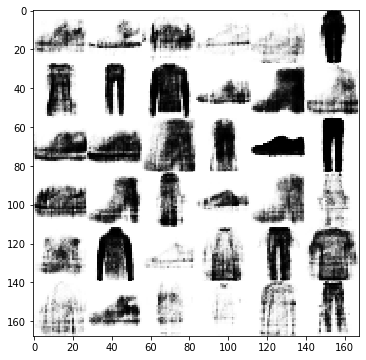

In [0]:
#Testing
# Generate images from noise, using the generator network

n = 6
canvas = np.empty((28*n, 28*n))
for i in range(n):
  #Noise input
  z_noise = np.random.uniform(-1.,1., size = [batch_size, z_noise_dim])
  # Generate image from noise
  g = sess.run(output_Gen, feed_dict = {z_input:z_noise})
  # Reverse colors for better display
  g=-1*(g-1)
  for j in range(n):
    #Draw the generated digits
    canvas[i*28:(i+1)*28, j*28:(j+1)*28] = g[j].reshape([28, 28])
    
plt.figure(figsize = (n,n))
plt.imshow(canvas, origin = "upper", cmap = "gray")
plt.show()